In [10]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

#加载usa_housing_price表格数据
data = pd.read_csv("usa_housing_price.csv")
# 查看数据 
data.head()  

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size,Price
0,79545.45857,5.317139,7.009188,23086.80050,188.214212,1.059034e+06
1,79248.64245,4.997100,6.730821,40173.07217,160.042526,1.505891e+06
2,61287.06718,5.134110,8.512727,36882.15940,227.273545,1.058988e+06
3,63345.24005,3.811764,5.586729,34310.24283,164.816630,1.260617e+06
4,59982.19723,5.959445,7.839388,26354.10947,161.966659,6.309435e+05


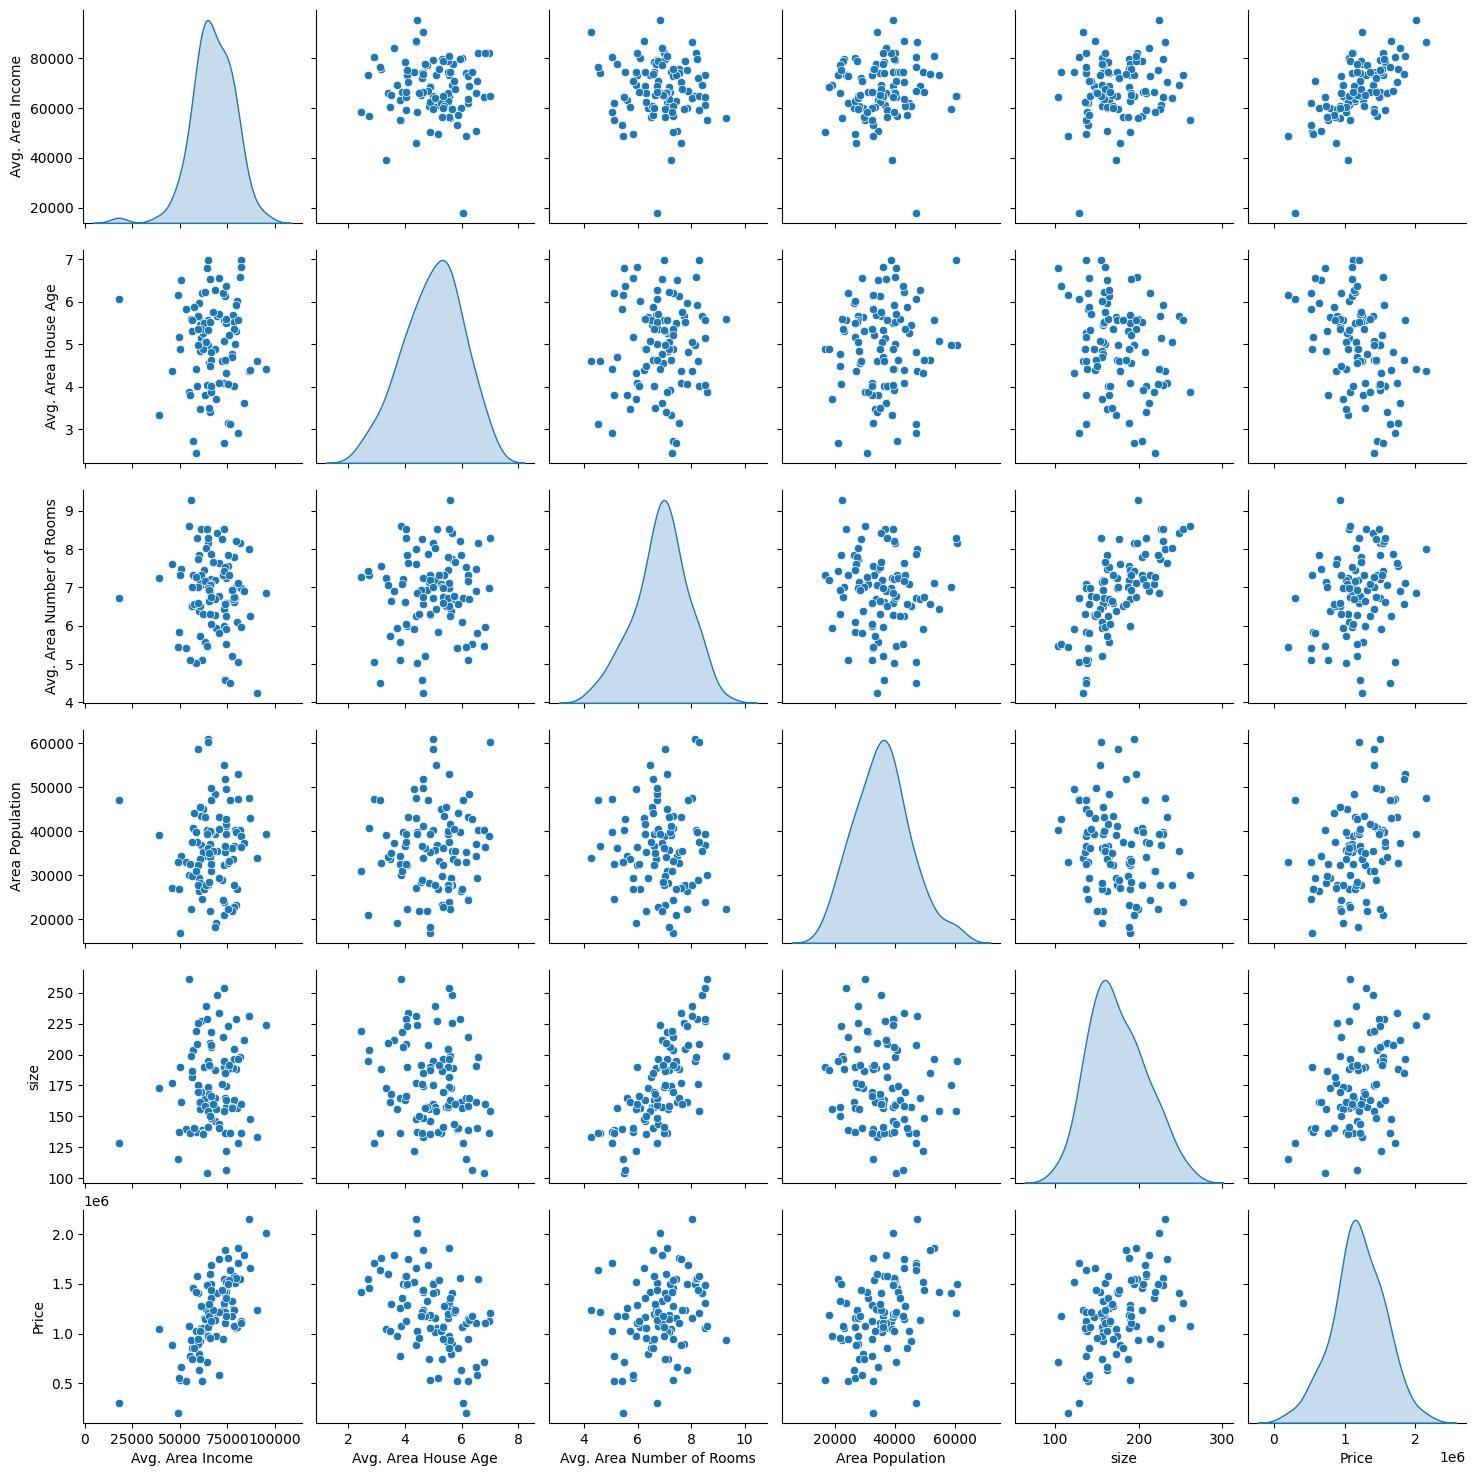

In [21]:
# 从表格中读取多列数据，并将这个多列数据赋值给x
x = data.loc[: ,['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Area Population','size']]
# 从表格中读取Price列数据，并将这个一列数据赋值给y
y = data.loc[: ,'Price']

# 选100个数据用于可视化数据之间的关系
x_show = x.head(100) 
y_show = y.head(100) 
data_show = pd.concat([y_show,x_show],axis=1) 
#pairplot用于绘制数据集中所有变量之间关系的函数。
grid=sns.pairplot(data=data_show,vars=['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Area Population','size','Price'],diag_kind = "kde")

In [23]:
#s建立模型
model = LinearRegression()
#训练模型
model.fit(x ,y)
#根据x预测得到predict
predict= model.predict(x)

In [24]:
#评估模型
mse = mean_squared_error(y,predict) 
r2 = r2_score(y,predict)
print('MSE:', mse)  
print('R^2 :', r2)  

MSE: 10219846512.177862
R^2 : 0.9180229195220739


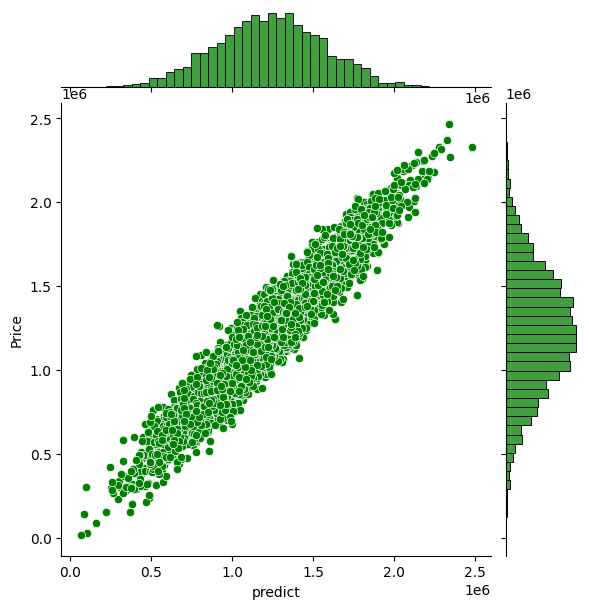

In [25]:
#可视化结果 由于x是一个五维数据，无法直接进行可视化。所以我们利用Y的值和预测值进行画图
g = sns.jointplot(x=predict, y=y, kind='scatter', color="g") 
g.ax_joint.set_xlabel('predict')  # 设置X轴的标签   
g.ax_joint.set_ylabel('Price')    # 设置Y轴的标签 
plt.show()